In [2]:
from __future__ import print_function, division
import torch
import numpy as np
import cv2
import os
import torchvision
from torchvision import transforms
from google.colab import drive
import random
from matplotlib import pyplot
from __future__ import print_function
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from torchvision.datasets.folder import IMG_EXTENSIONS
from torchvision.datasets import ImageFolder
import matplotlib.image as mpimg
%matplotlib inline
from skimage.io import imread
from tqdm import tqdm
import PIL
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip "/content/drive/MyDrive/DeepLearning/Project/data_upload_v3.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: data_upload_v3/test/non/Atelectasis/patient04316-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04347-study7-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04382-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04437-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04466-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04689-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04733-study7-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04773-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04773-study4-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient04826-study1-view1_frontal.jpg  
  inflating: data_upload_v3/test/non/Atelectasis/patient049

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        im = Image.open(os.path.join(folder,filename))
        img = cv2.imread(os.path.join(folder,filename))
        if im is not None:
            images.append(im)
    return images

# **Data Augmentation**

In [6]:
train_covid = load_images_from_folder('/content/data_upload_v3/train/covid')

In [7]:
print(len(train_covid))

84


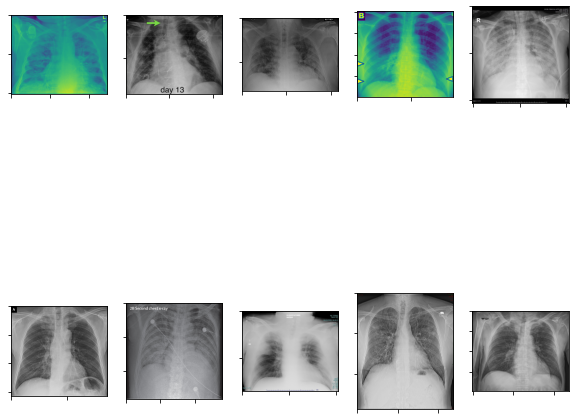

In [8]:
plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_covid[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.show()  

Resize Images

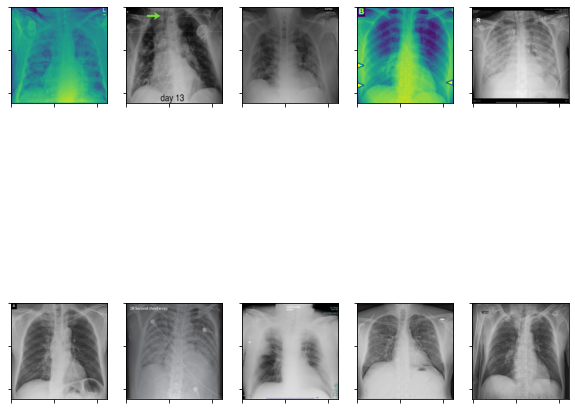

In [9]:
transforms_size = transforms.Compose([
        transforms.Resize((224,224)),
])

train_covid_resized = list()
for img in train_covid:
  new = transforms_size(img)
  train_covid_resized.append(new)

plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_covid_resized[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])


plt.show()    

Rotate Images

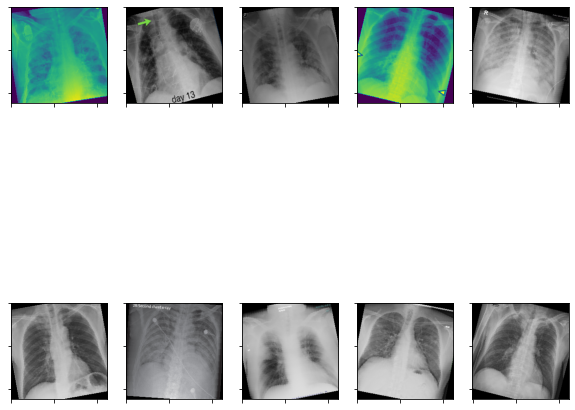

In [10]:
transforms_rotate = transforms.Compose([
        transforms.RandomRotation(15)
])

train_covid_trans1 = list()
for img in train_covid_resized:
  new = transforms_rotate(img)
  train_covid_trans1.append(new)

plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_covid_trans1[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()  

Flip Images

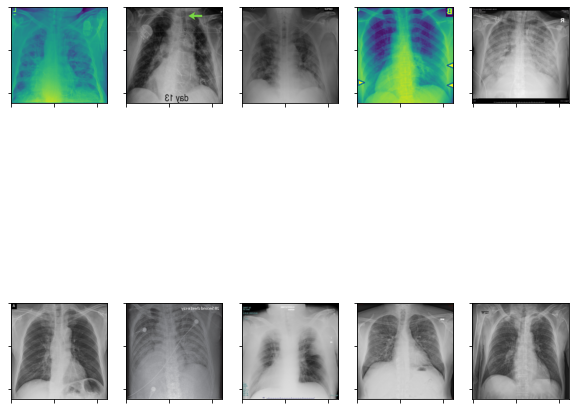

In [11]:
transforms_flip = transforms.Compose([
        torchvision.transforms.RandomHorizontalFlip()
])
train_covid_trans2 = list()
for img in train_covid_resized:
  new = transforms_flip(img)
  train_covid_trans2.append(new)

plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_covid_trans2[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.show()  

Add noise on images

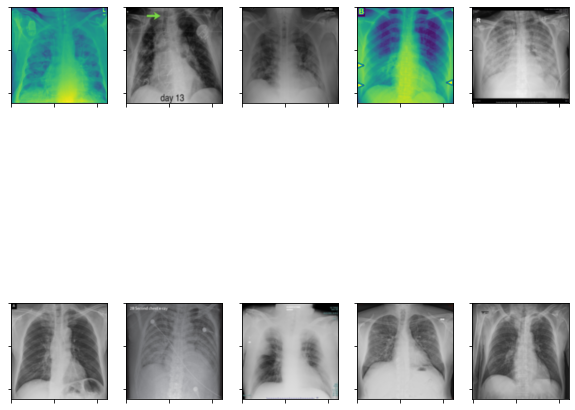

In [12]:
transforms_noisy = transforms.Compose([
        transforms.GaussianBlur(kernel_size =3,sigma= 3.0)
])

train_covid_trans3 = list()
for img in train_covid_resized:
  new = transforms_noisy(img)
  train_covid_trans3.append(new)

plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_covid_trans3[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.show() 

Mix transforms

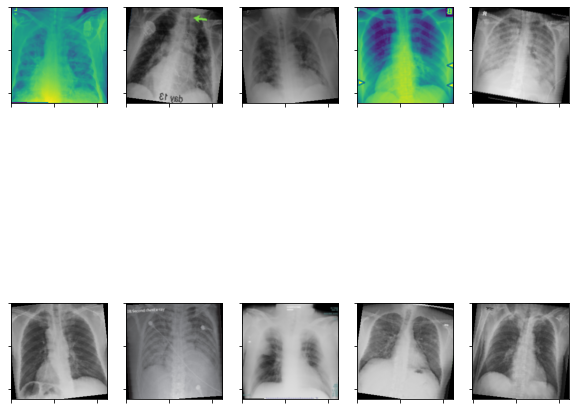

In [13]:
transforms_rotate = transforms.Compose([
        transforms.GaussianBlur(kernel_size =3,sigma= 3.0),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10)
])

train_covid_trans4 = list()
for img in train_covid_resized:
  new = transforms_rotate(img)
  train_covid_trans4.append(new)

plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_covid_trans4[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.show()  

420


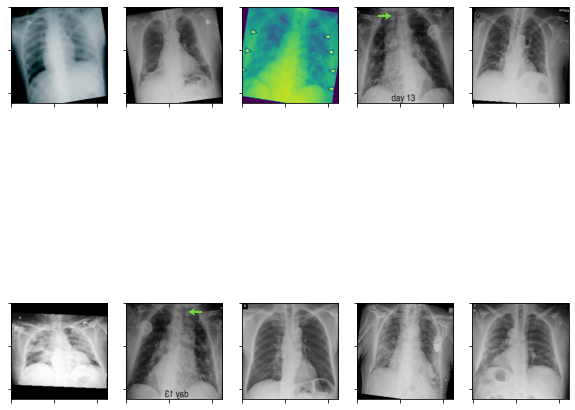

In [14]:
train_covid_new = train_covid_trans4 + train_covid_trans3 + train_covid_trans2 + train_covid_trans1 +  train_covid_resized 

print(len(train_covid_new))

random.shuffle(train_covid_new)

plt.figure(figsize=(10,10))
for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_covid_new[i])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
plt.show()  

In [15]:
import time
i = 0
for img in tqdm(train_covid_new):
  img.save('/content/data_upload_v3/train/covid/{}.png'.format(i))
  time.sleep(0.2) 
  i = i +1

100%|██████████| 420/420 [01:31<00:00,  4.60it/s]


In [ ]:
%cp -av /content/data_upload_v3 /content/drive/MyDrive